In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math

In [2]:
# 2019 broadband data file
broad_2019 = pd.read_csv("input/broadband_data_2019November.csv")
# Clean the data set by dropping rows with missing values
broad_2019[' BROADBAND USAGE '] = pd.to_numeric(broad_2019[' BROADBAND USAGE '], errors='coerce')
broad_2019[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2019[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
nan_value = float("NaN")
broad_2019.replace("-", nan_value, inplace = True)
broad_2019.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2019.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
broad_2019 = broad_2019.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])
broad_2019 = broad_2019.rename(columns={' BROADBAND AVAILABILITY PER FCC ':'BROADBAND AVAILABILITY PER FCC',' BROADBAND USAGE ':'BROADBAND USAGE' })

# 2020 broadband data file
broad_2020 = pd.read_csv("input/broadband_data_2020October.csv")
# Clean the data by dropping rows with missing values
broad_2020[' BROADBAND USAGE '] = pd.to_numeric(broad_2020[' BROADBAND USAGE '], errors='coerce')
broad_2020[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2020[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
broad_2020.replace("-", nan_value, inplace = True)
broad_2020.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2020.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
broad_2020 = broad_2020.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])
broad_2020 = broad_2020.rename(columns={' BROADBAND AVAILABILITY PER FCC ' : 'BROADBAND AVAILABILITY PER FCC', ' BROADBAND USAGE ':'BROADBAND USAGE'})

# broadband challenge file
#broad_challenge = pd.read_csv("./input/broadband_data_opendatachallenge.csv")

# broadband by zip code
broad_zip = pd.read_csv("input/broadband_data_zipcode.csv")

In [3]:
broad_2020

,ST,COUNTY ID,COUNTY NAME,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE
436,GA,13101,Echols County,0.0002,0.034
596,IL,17003,Alexander County,0.0009,0.104
947,KS,20119,Meade County,0.0010,0.141
52,AL,1105,Perry County,0.0012,0.032
535,GA,13301,Warren County,0.0019,0.049
...,...,...,...,...,...
2978,WA,53051,Pend Oreille County,1.0000,0.429
2383,SD,46045,Edmunds County,1.0000,0.420
682,IL,17175,Stark County,1.0000,0.235
676,IL,17163,St. Clair County,1.0000,0.558


In [4]:
broad_2019

,ST,COUNTY ID,COUNTY NAME,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE
2098,OH,39111,Monroe County,0.0,0.07
2194,OK,40127,Pushmataha County,0.0,0.05
2753,TX,48461,Upton County,0.0,0.06
936,KS,20097,Kiowa County,0.0,0.07
2189,OK,40117,Pawnee County,0.0,0.05
...,...,...,...,...,...
2104,OH,39123,Ottawa County,1.0,0.40
2099,OH,39113,Montgomery County,1.0,0.43
957,KS,20139,Osage County,1.0,0.13
952,KS,20129,Morton County,1.0,0.13


In [5]:
#Merge the two data data frames from 2019 and 2020
broad_change = pd.merge(broad_2019, broad_2020, on=['COUNTY ID','COUNTY NAME','ST'], validate="one_to_one")
#Rename the colums to more sensible names
broad_change = broad_change.rename(columns={"BROADBAND AVAILABILITY PER FCC_x": "AVAILABILITY_2019", "BROADBAND USAGE_x": "USAGE_2019",
        "BROADBAND AVAILABILITY PER FCC_y": "AVAILABILITY_2020", "BROADBAND USAGE_y": "USAGE_2020"})

#Find the the changes in availability and usage between 2020 and 2019
broad_change['AVAILABILITY_CHANGE'] = round((broad_change['AVAILABILITY_2020'] - broad_change['AVAILABILITY_2019'])*100,2)
broad_change['USAGE_CHANGE'] = round((broad_change['USAGE_2020'] - broad_change['USAGE_2019'])*100,2)

#Sort table
broad_change.sort_values('AVAILABILITY_CHANGE')
#broad_change.sort_values('USAGE_CHANGE')

#save the new data frame to a new csv fill
broad_change.to_csv('input/broadband_data_change.csv', index=False)

### 2019 broadband scatterplot

(0.0, 1.0)

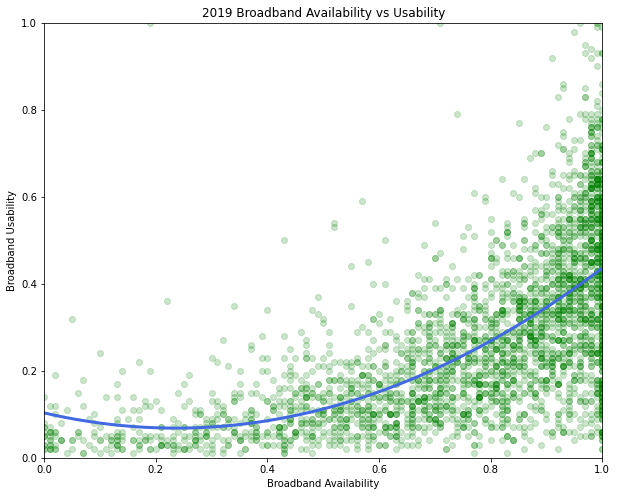

In [9]:
# TODO
plt.rcParams['figure.figsize'] = [10, 8]
plt.xlabel('Broadband Availability')
plt.ylabel('Broadband Usability')
plt.title('2019 Broadband Availability vs Usability')
plt.scatter(broad_2019['BROADBAND AVAILABILITY PER FCC'], broad_2019['BROADBAND USAGE'], alpha = 0.2, c = "green")

(a, b , c) = np.polyfit(broad_2019['BROADBAND AVAILABILITY PER FCC'], broad_2019['BROADBAND USAGE'], 2)
eq = a * broad_2019['BROADBAND AVAILABILITY PER FCC']**2 + b * broad_2019['BROADBAND AVAILABILITY PER FCC'] + c
plt.plot(broad_2019['BROADBAND AVAILABILITY PER FCC'], eq, c = 'royalblue', linewidth = 3)
plt.xlim(0, 1)
plt.ylim(0, 1)

### 2020 broadband scatterplot

(0.0, 1.0)

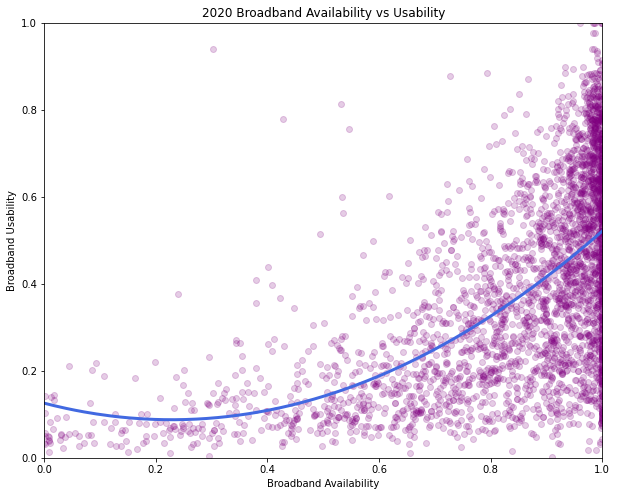

In [8]:
# TODO
plt.rcParams['figure.figsize'] = [10, 8]
plt.xlabel('Broadband Availability')
plt.ylabel('Broadband Usability')
plt.title('2020 Broadband Availability vs Usability')
plt.scatter(broad_2020['BROADBAND AVAILABILITY PER FCC'], broad_2020['BROADBAND USAGE'], alpha = 0.2, c = "purple")
(a, b , c) = np.polyfit(broad_2020['BROADBAND AVAILABILITY PER FCC'], broad_2020['BROADBAND USAGE'], 2)
eq = a * broad_2020['BROADBAND AVAILABILITY PER FCC']**2 + b * broad_2020['BROADBAND AVAILABILITY PER FCC'] + c
plt.plot(broad_2020['BROADBAND AVAILABILITY PER FCC'], eq, c = 'royalblue', linewidth = 3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.ylim(0, 1)

### Plot change in availability vs change in usability

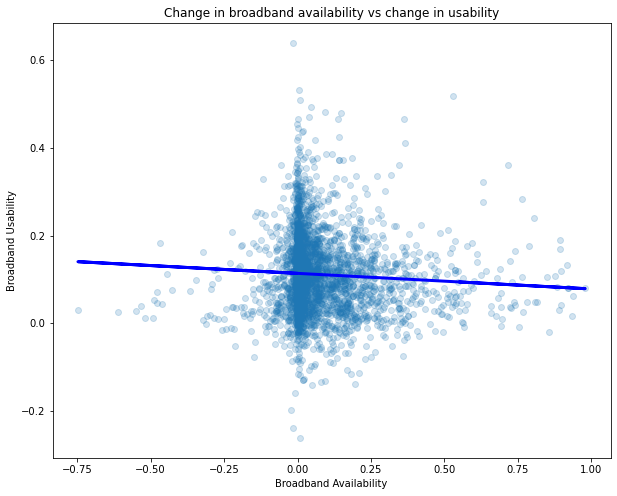

In [8]:
# Plot changes in availability and usage
plt.scatter(broad_change['AVAILABILITY_CHANGE'], broad_change['USAGE_CHANGE'], alpha = 0.2)
plt.title('Change in broadband availability vs change in usability')
plt.xlabel('Broadband Availability')
plt.ylabel('Broadband Usability')

# Best fit line showing net change
(m, b) = np.polyfit(broad_change['AVAILABILITY_CHANGE'], broad_change['USAGE_CHANGE'], 1)
eq = m * broad_change['AVAILABILITY_CHANGE'] + b
plt.plot(broad_change['AVAILABILITY_CHANGE'], eq, c = 'blue', linewidth = 3)

([<matplotlib.axis.XTick at 0x7f637059d0a0>,
 [Text(1, 0, '2019'), Text(2, 0, '2020')])

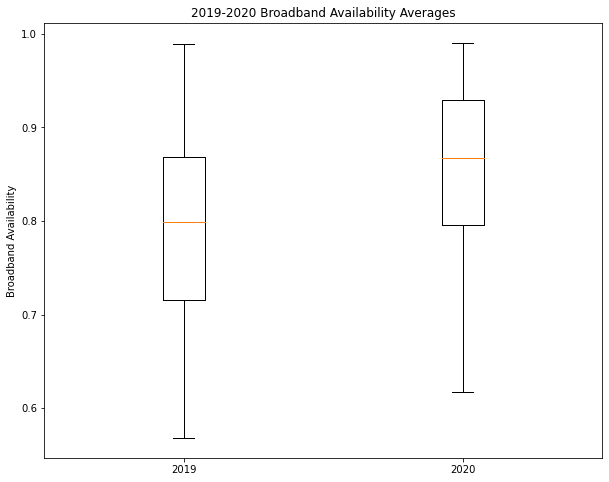

In [9]:
#Plot boxplots of Broadband Availability Averages for 2019 and 2020

plt.rcParams['figure.figsize'] = [10, 8]
plt.ylabel('Broadband Availability')
plt.title('2019-2020 Broadband Availability Averages')

states = broad_2019['ST'].unique()
availMeans2019 = []
for s in states :
    uniqueState = broad_2019.loc[broad_2019['ST'] == s]
    availMeans2019.append(uniqueState['BROADBAND AVAILABILITY PER FCC'].mean())
    
states = broad_2020['ST'].unique()
availMeans2020 = []
for s in states :
    uniqueState = broad_2020.loc[broad_2020['ST'] == s]
    availMeans2020.append(uniqueState['BROADBAND AVAILABILITY PER FCC'].mean())
    
plt.boxplot([availMeans2019, availMeans2020])
plt.xticks([1, 2], ['2019', '2020'])

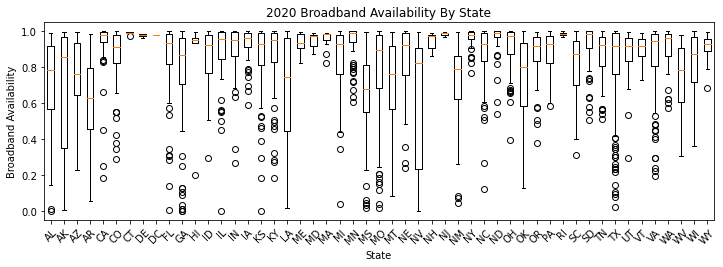

In [10]:
#

plt.rcParams['figure.figsize'] = [12, 8]

states = broad_2020['ST'].unique()
stateAvails = []
stateAvailMeans = []

for s in states :
    stateAvails.append(broad_2020['BROADBAND AVAILABILITY PER FCC'].loc[(broad_2020['ST'] == s)])
    stateAvailMeans.append(stateAvails[-1].mean())
    
plt.subplot(2,1,1)
plt.xlabel('State')
plt.ylabel('Broadband Availability')
plt.title('2020 Broadband Availability By State')
plt.boxplot(stateAvails)
x = np.linspace(1,51, 51)
plt.xticks(x, states, rotation=45)
plt.show()

<BarContainer object of 51 artists>

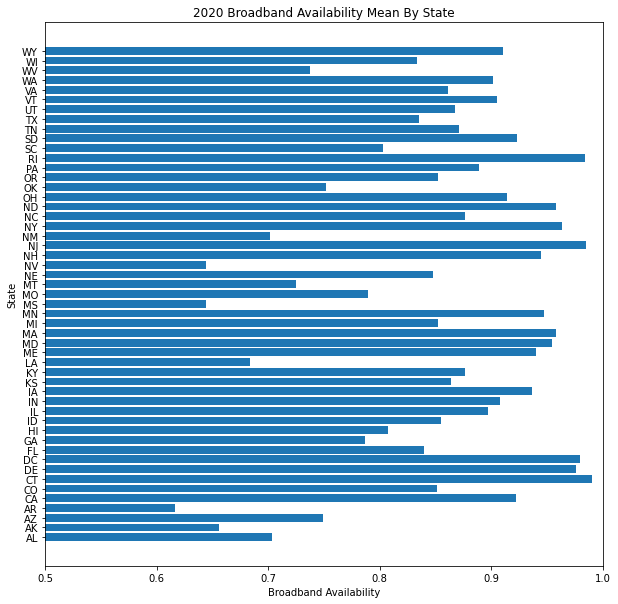

In [11]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Broadband Availability')
plt.ylabel('State')
plt.title('2020 Broadband Availability Mean By State')
plt.xlim(.5,1)
plt.barh(states,stateAvailMeans) #make nice, ya know